In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [11]:
# Loading the dataset into a dataframe
df = pd.read_csv('Weather.csv')

# Displaying the first few rows of the dataframe
df.head()

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Embarked  Has_Cabin  
0   7.2500         2          0  
1  71.2833         0          1  
2   7.9250         2          0  
3  53.1000         2          1  
4   8.0500         2          0

In [13]:
# Splitting the dataset into training and testing sets in an 80-20 ratio
X = df.drop('Survived', axis=1)  # Features
y = df['Survived']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shapes of the resulting datasets to confirm the split ratio
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((712, 11), (179, 11), (712,), (179,))

(Ticket          1
 Name            2
 Sex             3
 Fare            4
 PassengerId     5
 Age             6
 Pclass          7
 Has_Cabin       8
 SibSp           9
 Parch          10
 Embarked       11
 dtype: int32,
 0.8379888268156425,
 0.8156424581005587)

In [19]:
# Performing RFE on that 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression classifier
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize RFE
rfe = RFE(lr, n_features_to_select=1)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get the ranking of features
features_ranking = pd.Series(rfe.ranking_, index=X.columns)

# Sort features based on ranking
sorted_ranking = features_ranking.sort_values()

# Display the sorted feature ranking
sorted_ranking


Sex           1
Pclass        2
Has_Cabin     3
Embarked      4
SibSp         5
Parch         6
Age           7
Fare          8
Name          9
Ticket       10
dtype: int32

In [15]:
    # Sex (Rank: 1)
    # Pclass (Rank: 2)
    # Has_Cabin (Rank: 3)
    # Embarked (Rank: 4)
    # SibSp (Rank: 5)
    # Parch (Rank: 6)
    # Age (Rank: 7)
    # Fare (Rank: 8)
    # Name (Rank: 9)
    # Ticket (Rank: 10)

In [ ]:
# Training model based on the RFE features 

In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a dictionary to store the performance metrics for each model
RFE_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

# List of classifiers
RFE_classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Select the top-ranked features based on RFE
selected_features = sorted_ranking.index[:7]  # Selecting top 7 features based on RFE ranking
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train and evaluate each model
for name, clf in RFE_classifiers.items():
    # Train the model
    clf.fit(X_train_selected, y_train)
    
    # Make predictions on test set
    y_pred = clf.predict(X_test_selected)
    y_proba = clf.predict_proba(X_test_selected)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store the performance metrics
    RFE_metrics['Model'].append(name)
    RFE_metrics['Accuracy'].append(accuracy)
    RFE_metrics['Precision'].append(precision)
    RFE_metrics['Recall'].append(recall)
    RFE_metrics['F1-Score'].append(f1)
    RFE_metrics['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the performance metrics
performance_df = pd.DataFrame(RFE_metrics)
performance_df


Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.821229   0.800000  0.756757  0.777778  0.881081
1                  SVM  0.608939   0.833333  0.067568  0.125000  0.872844
2        Random Forest  0.793296   0.793651  0.675676  0.729927  0.856628
3          Naive Bayes  0.776536   0.688889  0.837838  0.756098  0.850064

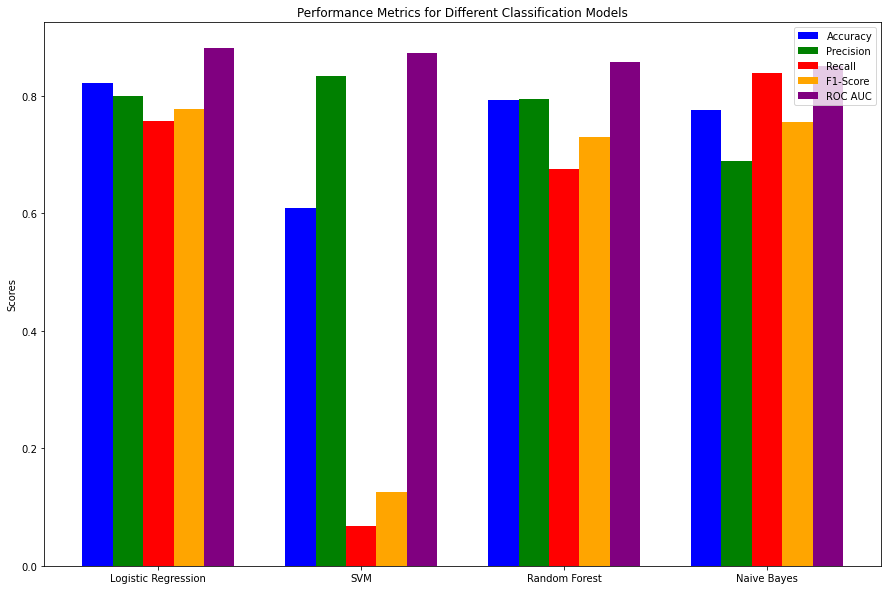

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axis for the bar plots
fig, ax = plt.subplots(figsize=(15, 10))

# Set up the x-axis positions and labels
x_labels = performance_df['Model']
x_pos = np.arange(len(x_labels))

# Width of each bar
width = 0.15

# Generate bar plots for each performance metric
ax.bar(x_pos - 2 * width, performance_df['Accuracy'], width=width, label='Accuracy', color='blue')
ax.bar(x_pos - width, performance_df['Precision'], width=width, label='Precision', color='green')
ax.bar(x_pos, performance_df['Recall'], width=width, label='Recall', color='red')
ax.bar(x_pos + width, performance_df['F1-Score'], width=width, label='F1-Score', color='orange')
ax.bar(x_pos + 2 * width, performance_df['ROC AUC'], width=width, label='ROC AUC', color='purple')

# Add labels and title
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Classification Models')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.legend()

# Show the plot
plt.show()


In [ ]:
# Logistic Regression has the highest Accuracy, F1-Score, and ROC AUC among the models.
# SVM performed poorly in terms of Recall and F1-Score, although its Precision is high.
# Random Forest and Naive Bayes also show good performance but are slightly behind Logistic Regression in most me

In [22]:
# For all features 


# Define a dictionary to store the performance metrics for each model using all features
allfeatures_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

# Train and evaluate each model using all features
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store the performance metrics
    allfeatures_metrics['Model'].append(name)
    allfeatures_metrics['Accuracy'].append(accuracy)
    allfeatures_metrics['Precision'].append(precision)
    allfeatures_metrics['Recall'].append(recall)
    allfeatures_metrics['F1-Score'].append(f1)
    allfeatures_metrics['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the performance metrics
performance_df_all_features = pd.DataFrame(allfeatures_metrics)
performance_df_all_features


Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.815642   0.797101  0.743243  0.769231  0.886358
1                  SVM  0.664804   0.791667  0.256757  0.387755  0.730888
2        Random Forest  0.826816   0.794521  0.783784  0.789116  0.912934
3          Naive Bayes  0.798883   0.743590  0.783784  0.763158  0.849292

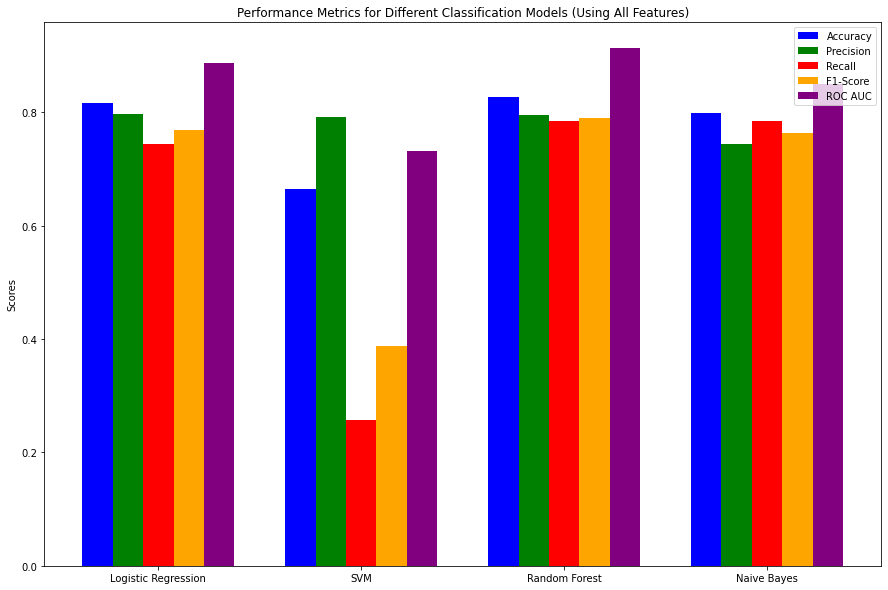

In [23]:
# Set up the figure and axis for the bar plots using all features
fig, ax = plt.subplots(figsize=(15, 10))

# Generate bar plots for each performance metric using all features
ax.bar(x_pos - 2 * width, performance_df_all_features['Accuracy'], width=width, label='Accuracy', color='blue')
ax.bar(x_pos - width, performance_df_all_features['Precision'], width=width, label='Precision', color='green')
ax.bar(x_pos, performance_df_all_features['Recall'], width=width, label='Recall', color='red')
ax.bar(x_pos + width, performance_df_all_features['F1-Score'], width=width, label='F1-Score', color='orange')
ax.bar(x_pos + 2 * width, performance_df_all_features['ROC AUC'], width=width, label='ROC AUC', color='purple')

# Add labels and title using all features
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Classification Models (Using All Features)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.legend()

# Show the plot
plt.show()


In [24]:
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize the SVM classifier
svm = SVC(probability=True, random_state=42)

# Initialize forward selection feature selector using SVM
sfsbasedselector = SequentialFeatureSelector(svm, n_features_to_select=None, direction='forward', scoring='accuracy')

# Fit the forward selector
sfsbasedselector = sfsbasedselector.fit(X_train, y_train)

# Get the mask of selected features
selected_mask = sfsbasedselector.get_support()

# Get the names of the selected features based on the mask
sfs_selected_features = X.columns[selected_mask]

# Display the selected features based on forward selection
sfs_selected_features.tolist()


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\feature_selection\_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [ ]:
# ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [25]:
# Define a dictionary to store the performance metrics for each model using forward-selected features
forward_features = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

# Use only the selected features based on forward selection for training and testing
X_train_forward = X_train[selected_features_forward]
X_test_forward = X_test[selected_features_forward]

# Train and evaluate each model using forward-selected features
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_forward, y_train)
    
    # Make predictions on test set
    y_pred = clf.predict(X_test_forward)
    y_proba = clf.predict_proba(X_test_forward)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store the performance metrics
    forward_features['Model'].append(name)
    forward_features['Accuracy'].append(accuracy)
    forward_features['Precision'].append(precision)
    forward_features['Recall'].append(recall)
    forward_features['F1-Score'].append(f1)
    forward_features['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the performance metrics
performance_df_forward = pd.DataFrame(forward_features)
performance_df_forward


Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.770950   0.708861  0.756757  0.732026  0.857014
1                  SVM  0.798883   0.796875  0.689189  0.739130  0.822136
2        Random Forest  0.787709   0.810345  0.635135  0.712121  0.850901
3          Naive Bayes  0.770950   0.708861  0.756757  0.732026  0.865894

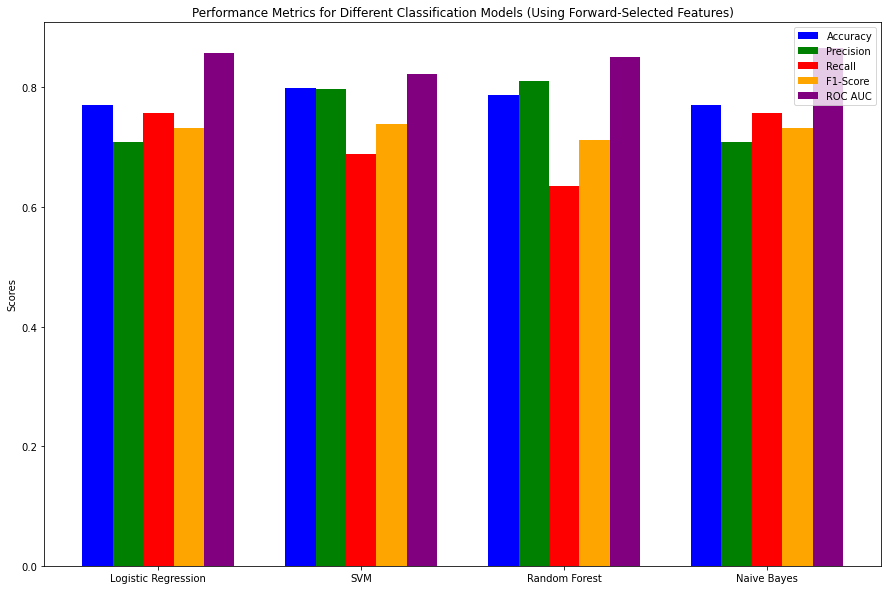

In [26]:
# Set up the figure and axis for the bar plots using forward-selected features
fig, ax = plt.subplots(figsize=(15, 10))

# Generate bar plots for each performance metric using forward-selected features
ax.bar(x_pos - 2 * width, performance_df_forward['Accuracy'], width=width, label='Accuracy', color='blue')
ax.bar(x_pos - width, performance_df_forward['Precision'], width=width, label='Precision', color='green')
ax.bar(x_pos, performance_df_forward['Recall'], width=width, label='Recall', color='red')
ax.bar(x_pos + width, performance_df_forward['F1-Score'], width=width, label='F1-Score', color='orange')
ax.bar(x_pos + 2 * width, performance_df_forward['ROC AUC'], width=width, label='ROC AUC', color='purple')

# Add labels and title using forward-selected features
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Classification Models (Using Forward-Selected Features)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.legend()

# Show the plot
plt.show()


In [27]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize backward selection feature selector using Random Forest
backward_selector = SequentialFeatureSelector(rf, n_features_to_select=None, direction='backward', scoring='accuracy')

# Fit the backward selector
backward_selector = backward_selector.fit(X_train, y_train)

# Get the mask of selected features
selected_mask_backward = backward_selector.get_support()

# Get the names of the selected features based on the mask
selected_features_backward = X.columns[selected_mask_backward]

# Display the selected features based on backward selection
selected_features_backward.tolist()


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\feature_selection\_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


['Pclass', 'Name', 'Sex', 'Age', 'Fare']

In [ ]:
# ['Pclass', 'Name', 'Sex', 'Age', 'Fare']

In [28]:
# Define a dictionary to store the performance metrics for each model using backward-selected features
backward_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC AUC': []
}

# Use only the selected features based on backward selection for training and testing
X_train_backward = X_train[selected_features_backward]
X_test_backward = X_test[selected_features_backward]

# Train and evaluate each model using backward-selected features
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train_backward, y_train)
    
    # Make predictions on test set
    y_pred = clf.predict(X_test_backward)
    y_proba = clf.predict_proba(X_test_backward)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store the performance metrics
    backward_metrics['Model'].append(name)
    backward_metrics['Accuracy'].append(accuracy)
    backward_metrics['Precision'].append(precision)
    backward_metrics['Recall'].append(recall)
    backward_metrics['F1-Score'].append(f1)
    backward_metrics['ROC AUC'].append(roc_auc)

# Create a DataFrame to display the performance metrics
performance_df_backward = pd.DataFrame(backward_metrics)
performance_df_backward


Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.804469   0.774648  0.743243  0.758621  0.872458
1                  SVM  0.603352   0.800000  0.054054  0.101266  0.761905
2        Random Forest  0.815642   0.797101  0.743243  0.769231  0.896976
3          Naive Bayes  0.759777   0.706667  0.716216  0.711409  0.844144

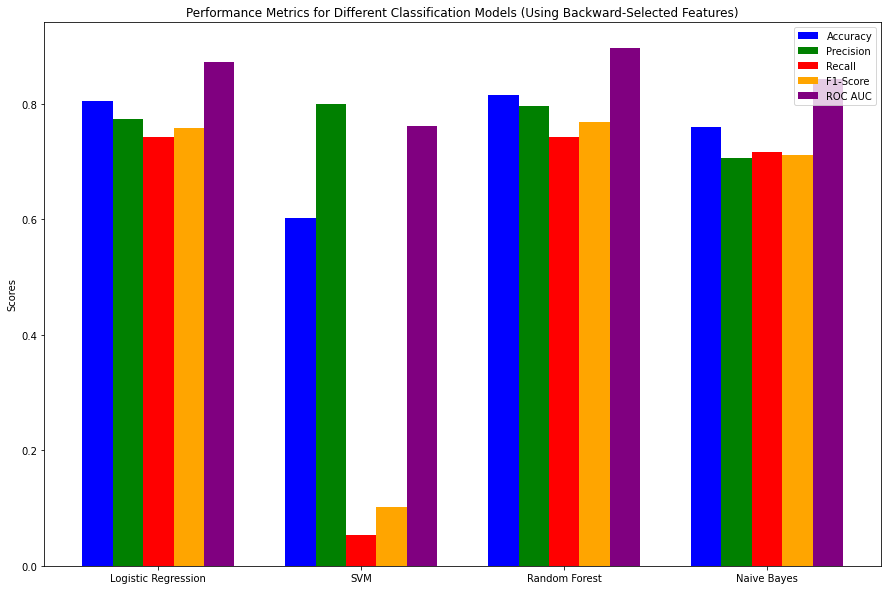

In [29]:
# Set up the figure and axis for the bar plots using backward-selected features
fig, ax = plt.subplots(figsize=(15, 10))

# Generate bar plots for each performance metric using backward-selected features
ax.bar(x_pos - 2 * width, performance_df_backward['Accuracy'], width=width, label='Accuracy', color='blue')
ax.bar(x_pos - width, performance_df_backward['Precision'], width=width, label='Precision', color='green')
ax.bar(x_pos, performance_df_backward['Recall'], width=width, label='Recall', color='red')
ax.bar(x_pos + width, performance_df_backward['F1-Score'], width=width, label='F1-Score', color='orange')
ax.bar(x_pos + 2 * width, performance_df_backward['ROC AUC'], width=width, label='ROC AUC', color='purple')

# Add labels and title using backward-selected features
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Classification Models (Using Backward-Selected Features)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.legend()

# Show the plot
plt.show()


In [ ]:
#     Logistic Regression: Performs well across all metrics, with particularly high accuracy and ROC AUC scores.

#     SVM: Struggles severely, especially in the Recall and F1-Score metrics. Although its precision is high, 
#it's not balanced out by its recall, resulting in a low F1-Score.

#     Random Forest: Exhibits the best performance in terms of Accuracy, F1-Score, and ROC AUC. 
#It's a well-rounded model based on these features.

#     Naive Bayes: Provides balanced performance, with all metrics except Precision being fairly high. 
#It performs particularly well in terms of Recall and F1-Score.

# Overall, Random Forest appears to be the best-performing model when using the backward-selected features, 
#especially in terms of Accuracy and ROC AUC.